# **EDA Preliminar de los datasets de Google Maps**

### Bienvenidos al proceso de EDA preliminar. En este analizaremos distintas muestras de los datasets disponiples con la finalidad de comprender que tipos de datos podemos obtener de ellos para realizar el proyecto, vizualizar las diferentes falencias tales como datos duplicados, faltantes, extremos; comprender las relaciones entre ellos, elegir aquellos que pueden ser métricas relevantes para nuestros KPIs. Sugerir fuentes de datos complementarios en caso de considerarlos necesarios. Y finalmente, definir el formato en el cual requerimos que se disponibilice la información.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Datos Extras: Cantidad de población por Estado

---



Utilizaremos un dataset descargado desde el siguiente link: https://datosmacro.expansion.com/demografia/poblacion/usa-estados para tener una visualización rapida de la densidad y poblacion de cada estado de Estados Unidos

Una vez obtenida la información tomaremos el top 5 de estados con mayor población para filtrar los datasets por estos 5 estados.

In [ ]:
'''Descargamos un dataset con la densidad y población de los estados de Estados Unidos en 2021'''

# Abrimos el dataset
densidad = pd.read_csv("datasets/DensidadPobl.csv", sep=';', encoding='Latin1', thousands='.')

densidad.head()

,Estados,Densidad,Poblacion
0,Alaska,0,732673
1,Alabama,37,5039877
2,Arkansas,22,3025891
3,Arizona,25,7276316
4,California,93,39237836


In [ ]:
# Verificamos cuantos nulos hay
densidad.isnull().sum()

Estados      0
Densidad     0
Poblacion    0
dtype: int64

In [ ]:
# Verificamos la cantidad de datos duplicados
densidad.duplicated().sum()

0

In [ ]:
densidad = densidad.sort_values('Poblacion', ascending=False)

In [ ]:
densidad.head()

,Estados,Densidad,Poblacion
4,California,93,39237836
42,Texas,42,29527941
8,Florida,128,21781128
33,Nueva York,140,19835913
37,Pensilvania,109,12964056


In [ ]:
top5= densidad.head()

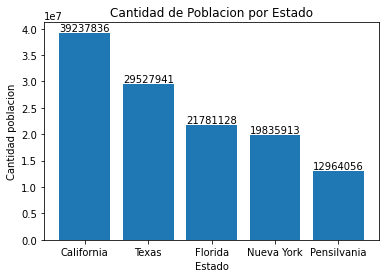

In [ ]:
plt.bar(top5['Estados'], top5['Poblacion'])

# Agregar anotaciones con los valores de Densidad
for i, v in enumerate(top5['Poblacion']):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Configurar el título y las etiquetas de los ejes
plt.title('Cantidad de Poblacion por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad poblacion')

# Mostrar el gráfico
plt.show()

Como podemos observar en el gráfico anterior, los estados con mayor densidad poblacional son California, Texas, Florida, Nueva York y Pensilvania.

Concentraremos nuestro análisis en estos 5.

In [ ]:
''' Nos conectamos con el bucket donde se almacenan los datasets '''
!pip install google.cloud 

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import storage
client = storage.Client(project='concrete-bridge-379920')
bucket = client.get_bucket('datasets-pg')

### Abrimos diferentes archivo .json de la carpeta 'reviews-estados' a modo de muestra

# **Estado de California**

In [ ]:
''' Abrimos el primer archivo .json de las reviews referidas al estado de California '''
blob = bucket.blob('Google-Maps/reviews-estados/review-California/1.json')
datos_str = blob.download_as_string()
reviews_california = pd.read_json(datos_str, lines=True)
reviews_california

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
...,...,...,...,...,...,...,...,...
149995,1.081939e+20,Raffi Khatchadourian,1583646462958,5,None,None,None,0x80c299484c7709cd:0x89510434231b14d4
149996,1.075762e+20,Noah Vincent Ford,1605055631573,5,None,None,None,0x80c299484c7709cd:0x89510434231b14d4
149997,1.008113e+20,David Karwaski,1597443113544,5,None,None,None,0x80c299484c7709cd:0x89510434231b14d4
149998,1.177078e+20,Reynalda Vargaz,1573479297751,5,None,None,None,0x80c299484c7709cd:0x89510434231b14d4


In [ ]:
''' Visualizamos el tipo de dato de cada columna '''
reviews_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     89135 non-null   object 
 5   pics     5632 non-null    object 
 6   resp     16935 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [ ]:
reviews_california.describe()

,user_id,time,rating
count,1.500000e+05,1.500000e+05,150000.00000
mean,1.096641e+20,1.553771e+12,4.31154
std,5.140433e+18,5.169336e+10,1.21477
min,1.000002e+20,1.081296e+12,1.00000
25%,1.055420e+20,1.521335e+12,4.00000
50%,1.096182e+20,1.558723e+12,5.00000
75%,1.140358e+20,1.595102e+12,5.00000
max,1.184467e+20,1.631149e+12,5.00000


In [ ]:
reviews_california.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

*   user_id = id del usuario que hace la reseña
*   name = nombre del usuario
*   time = fecha en que se realizo la reseña
*   rating = calificación dada por el usuario del 1 al 5
*   text = reseña del usuario
*   pics = url de las fotos que acompañan a la reseña
*   resp = respuesta de la reseña por parte del negocio, contiene de forma anidada una fecha y un texto
*   gmap_id = id del mapa

In [ ]:
''' Transformamos la columna 'time' a formato date ''' 

reviews_california['time'] = pd.to_datetime(reviews_california['time'], unit='ms')#.dt.strftime('%Y - %m - %d')

In [ ]:
reviews_california.time

0        2021-01-06 05:12:07.056
1        2021-02-09 05:47:28.663
2        2020-03-08 05:04:42.296
3        2019-03-07 05:56:56.355
4        2017-05-16 05:01:41.933
                   ...          
149995   2020-03-08 05:47:42.958
149996   2020-11-11 00:47:11.573
149997   2020-08-14 22:11:53.544
149998   2019-11-11 13:34:57.751
149999   2020-10-02 00:23:20.197
Name: time, Length: 150000, dtype: datetime64[ns]

## Valores faltantes

In [ ]:
reviews_california.isnull().sum()

user_id         0
name            0
time            0
rating          0
text        60865
pics       144368
resp       133065
gmap_id         0
dtype: int64

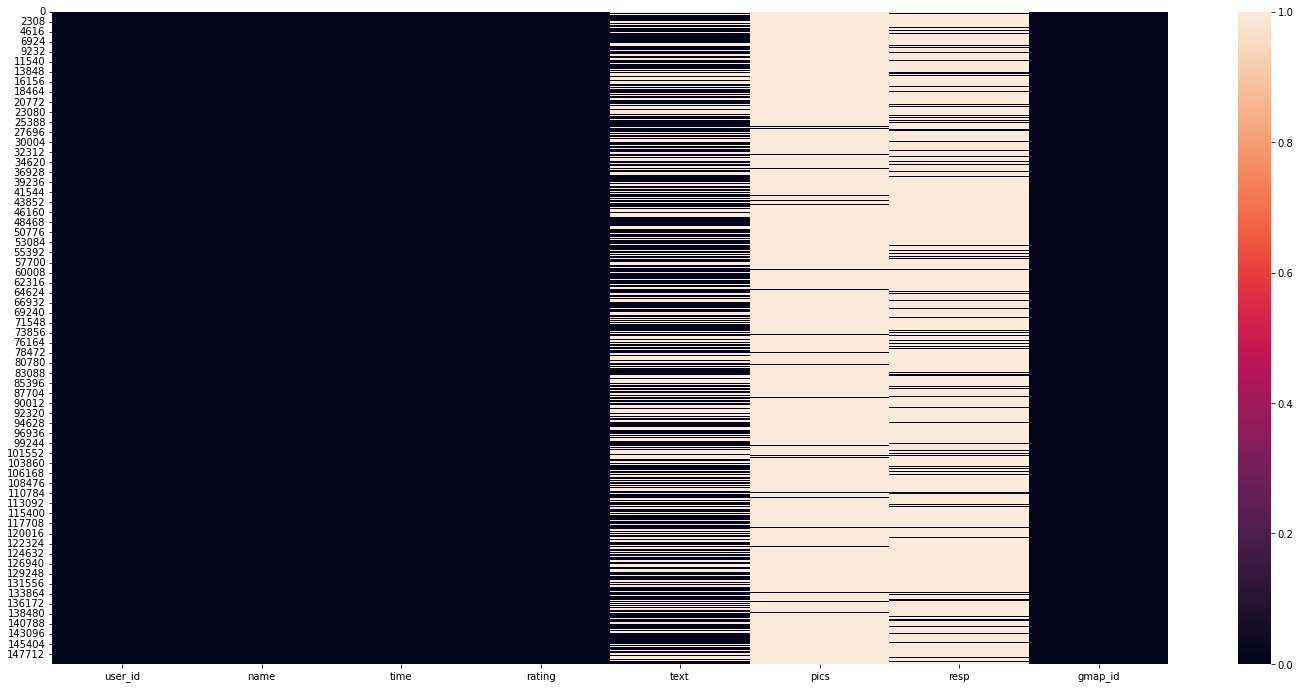

In [ ]:
plt.figure(figsize= (25,12))
sns.heatmap(reviews_california.isnull())
plt.show()

## Valores atípicos

#### Valores atípicos de la columna 'rating'

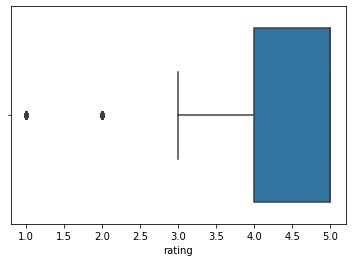

In [ ]:
sns.boxplot(x='rating', data = reviews_california)
plt.show()

In [ ]:
''' Menor valor de calificación ''' 
reviews_california.rating.min()

1

In [ ]:
''' Mayor valor de calificación '''
reviews_california.rating.max()

5

###Valores atípicos de la columna 'time'

In [ ]:
''' visualizo nuevamente el tipo de datos de la columna time ya que estaban en str y tuve que modificar el código ''' 
type(reviews_california['time'][1])

pandas._libs.tslibs.timestamps.Timestamp

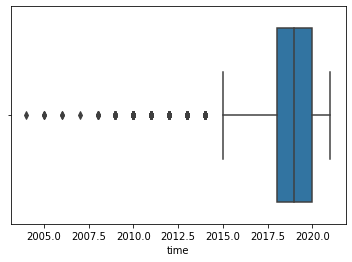

In [ ]:
''' hago un boxplot con los años de la columna time '''
sns.boxplot(x=reviews_california['time'].dt.year, data = reviews_california)
plt.show()

In [ ]:
''' Año menor de los registros '''
reviews_california['time'].dt.year.min()

2004

In [ ]:
''' Año mayor de los registros '''
reviews_california['time'].dt.year.max()

2021

## Valores duplicados

In [ ]:
''' Eliminamos aquellas columnas que tienen listas anidadas '''
reviews_california.drop(columns= ['name','pics', 'resp'], inplace=True)

In [ ]:
''' Total de filas con valores duplicados '''
reviews_california.duplicated().sum()

14779

In [ ]:
duplicados = reviews_california.duplicated()

num_duplicados = duplicados.sum()
num_no_duplicados = len(reviews_california) - num_duplicados


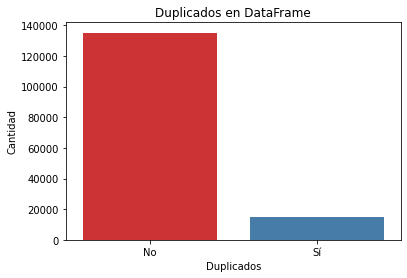

In [ ]:
sns.countplot(x=duplicados, palette='Set1')
plt.title('Duplicados en DataFrame')
plt.xlabel('Duplicados')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# **Estado de New York**

In [ ]:
''' Abrimos el primer archivo .json de las reviews referidas al estado de New York '''
blob = bucket.blob('Google-Maps/reviews-estados/review-New_York/5.json')
datos_str = blob.download_as_string()
reviews_ny = pd.read_json(datos_str, lines=True)
reviews_ny

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.120959e+20,Sharyn R,1618536541236,5,Awesome Food 😄😁 Chill and cool staff.,None,None,0x89c25daf13bc726b:0x7f609addad46f073
1,1.003088e+20,gcas8609,1612889799718,1,The Most DISGUSTING food I've had in my whole ...,None,None,0x89c25daf13bc726b:0x7f609addad46f073
2,1.013553e+20,Hbgn,1604011105812,1,Not worth the price. Foods tastes dull and old...,None,None,0x89c25daf13bc726b:0x7f609addad46f073
3,1.154654e+20,Sammy Solar,1607188303287,5,Delicious food and a big menu to choose from a...,None,None,0x89c25daf13bc726b:0x7f609addad46f073
4,1.153217e+20,Kat P,1594215598522,4,I love the food here very flavorful each visit...,None,None,0x89c25daf13bc726b:0x7f609addad46f073
...,...,...,...,...,...,...,...,...
149995,1.053874e+20,Spike Buxton,1510989425059,5,One of my favorites in all of New York City. A...,None,None,0x89c24f8abea01a3d:0xd384fb4e9f6e7a84
149996,1.159938e+20,熹熙,1577491326346,3,High prices. Pretty rude to me calling. Didnt ...,None,None,0x89c24f8abea01a3d:0xd384fb4e9f6e7a84
149997,1.038091e+20,Michael Mark,1562114823708,5,Linda and Maggie always trim your nails just l...,None,None,0x89c24f8abea01a3d:0xd384fb4e9f6e7a84
149998,1.132527e+20,Charles Olson,1554552427163,5,I had an awesome experience at the Pink & Whit...,None,None,0x89c24f8abea01a3d:0xd384fb4e9f6e7a84


In [ ]:
''' Visualizamos el tipo de dato de cada columna '''
reviews_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     86203 non-null   object 
 5   pics     5503 non-null    object 
 6   resp     14271 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [ ]:
reviews_ny.describe()

,user_id,time,rating
count,1.500000e+05,1.500000e+05,150000.000000
mean,1.093286e+20,1.551322e+12,4.305347
std,5.227837e+18,4.686639e+10,1.128077
min,1.000000e+20,6.626016e+11,1.000000
25%,1.047377e+20,1.524839e+12,4.000000
50%,1.093121e+20,1.556020e+12,5.000000
75%,1.138576e+20,1.581539e+12,5.000000
max,1.184465e+20,1.624606e+12,5.000000


In [ ]:
reviews_ny.shape

(150000, 8)

In [ ]:
reviews_ny.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

*   user_id = id del usuario que hace la reseña
*   name = nombre del usuario
*   time = fecha en que se realizo la reseña
*   rating = calificación dada por el usuario del 1 al 5
*   text = reseña del usuario
*   pics = url de las fotos que acompañan a la reseña
*   resp = respuesta de la reseña por parte del negocio, contiene de forma anidada una fecha y un texto
*   gmap_id = id del mapa

In [ ]:
''' Transformamos la columna 'time' a formato date ''' 

reviews_ny['time'] = pd.to_datetime(reviews_ny['time'], unit='ms')#.dt.strftime('%Y - %m - %d')

In [ ]:
#Usuarios unicos
print(f"Hay {len(reviews_ny['user_id'].unique())} usuarios unicos")

Hay 116000 usuarios unicos


## Valores faltantes

In [ ]:
reviews_ny.isnull().sum().sort_values(ascending = False)

pics       144497
resp       135729
text        63797
user_id         0
name            0
time            0
rating          0
gmap_id         0
dtype: int64

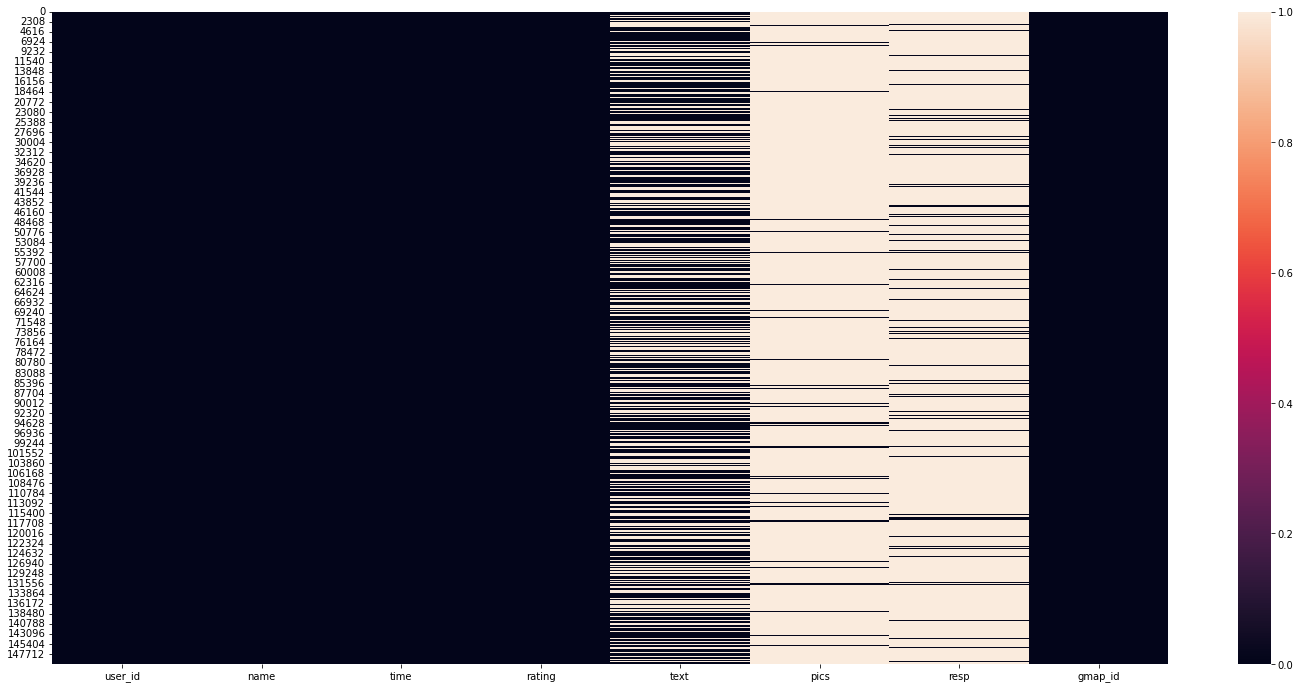

In [ ]:
plt.figure(figsize= (25,12))
sns.heatmap(reviews_ny.isnull())
plt.show()

## Valores atípicos

Valores atípicos de la columna rating

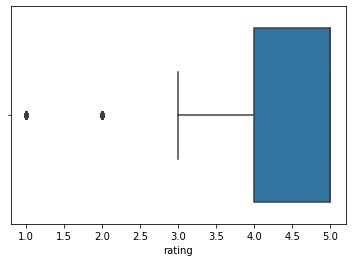

In [ ]:
sns.boxplot(x = 'rating', data = reviews_ny)
plt.show()

In [ ]:
''' Menor valor de calificación ''' 
reviews_ny.rating.min()

1

In [ ]:
''' Mayor valor de calificación ''' 
reviews_ny.rating.max()

5

## Valores duplicados

In [ ]:
''' Eliminamos aquellas columnas que tienen listas anidadas '''
reviews_ny.drop(columns= ['name','pics', 'resp'], inplace=True)

In [ ]:
print(f"Hay {reviews_ny.duplicated().sum()} valores duplicados")

Hay 2580 valores duplicados


In [ ]:
duplicados = reviews_ny.duplicated()

num_duplicados = duplicados.sum()
num_no_duplicados = len(reviews_ny) - num_duplicados

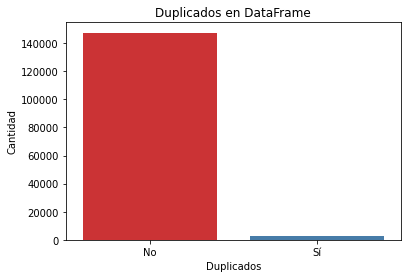

In [ ]:
sns.countplot(x= duplicados, palette='Set1')
plt.title('Duplicados en DataFrame')
plt.xlabel('Duplicados')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# **Estado de Texas**

In [ ]:
''' Abrimos el primer archivo .json de las reviews referidas al estado de Texas '''
blob = bucket.blob('Google-Maps/reviews-estados/review-Texas/10.json')
datos_str = blob.download_as_string()
reviews_Texas = pd.read_json(datos_str, lines=True)
reviews_Texas

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.025399e+20,Maria torres,1520065882777,5,None,None,None,0x8640d215ff1e43e5:0xaeeb5211a25191f4
1,1.152979e+20,Brittaney Lunsford,1546127546702,5,None,None,None,0x8640d215ff1e43e5:0xaeeb5211a25191f4
2,1.002856e+20,Agnes,1567470805179,5,None,None,None,0x8640d215ff1e43e5:0xaeeb5211a25191f4
3,1.083442e+20,Luis E Ortiz,1501458412770,3,None,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x8640d215ff1e43e5:0xaeeb5211a25191f4
4,1.036427e+20,Jennifer Frosch,1573946175218,4,None,None,None,0x8640d215ff1e43e5:0xaeeb5211a25191f4
...,...,...,...,...,...,...,...,...
149995,1.150015e+20,kim basak,1606391412832,5,None,None,None,0x864c23ee6b5d9d09:0x3cc9cba7f179b2ee
149996,1.159675e+20,Raveena Patel,1610605735010,5,None,None,None,0x864c23ee6b5d9d09:0x3cc9cba7f179b2ee
149997,1.068207e+20,Tom Tran,1582609316658,5,None,None,None,0x864c23ee6b5d9d09:0x3cc9cba7f179b2ee
149998,1.133652e+20,Ambarin,1581126701849,4,None,None,"{'time': 1581699253649, 'text': 'Hi Ambarin, T...",0x864c23ee6b5d9d09:0x3cc9cba7f179b2ee


In [ ]:
''' Visualizamos el tipo de dato de cada columna '''
reviews_Texas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     87942 non-null   object 
 5   pics     4213 non-null    object 
 6   resp     23763 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [ ]:
reviews_Texas.describe()

,user_id,time,rating
count,1.500000e+05,1.500000e+05,150000.000000
mean,1.092769e+20,1.553760e+12,4.284360
std,5.285837e+18,4.362761e+10,1.169753
min,1.000000e+20,1.247805e+12,1.000000
25%,1.046589e+20,1.526694e+12,4.000000
50%,1.092445e+20,1.557092e+12,5.000000
75%,1.138660e+20,1.582833e+12,5.000000
max,1.184467e+20,1.624258e+12,5.000000


In [ ]:
reviews_Texas.shape

(150000, 8)

In [ ]:
reviews_Texas.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

*   user_id = id del usuario que hace la reseña
*   name = nombre del usuario
*   time = fecha en que se realizo la reseña
*   rating = calificación dada por el usuario del 1 al 5
*   text = reseña del usuario
*   pics = url de las fotos que acompañan a la reseña
*   resp = respuesta de la reseña por parte del negocio, contiene de forma anidada una fecha y un texto
*   gmap_id = id del mapa

In [ ]:
''' Transformamos la columna 'time' a formato date ''' 

reviews_Texas['time'] = pd.to_datetime(reviews_Texas['time'], unit='ms')#.dt.strftime('%Y - %m - %d')

In [ ]:
reviews_Texas.time

0        2018-03-03 08:31:22.777
1        2018-12-29 23:52:26.702
2        2019-09-03 00:33:25.179
3        2017-07-30 23:46:52.770
4        2019-11-16 23:16:15.218
                   ...          
149995   2020-11-26 11:50:12.832
149996   2021-01-14 06:28:55.010
149997   2020-02-25 05:41:56.658
149998   2020-02-08 01:51:41.849
149999   2020-12-11 22:43:40.671
Name: time, Length: 150000, dtype: datetime64[ns]

In [ ]:
#Usuarios unicos
print(f"Hay {len(reviews_Texas['user_id'].unique())} usuarios unicos")

Hay 124269 usuarios unicos


## Valores faltantes

In [ ]:
reviews_Texas.isnull().sum().sort_values(ascending = False)

pics       145787
resp       126237
text        62058
user_id         0
name            0
time            0
rating          0
gmap_id         0
dtype: int64

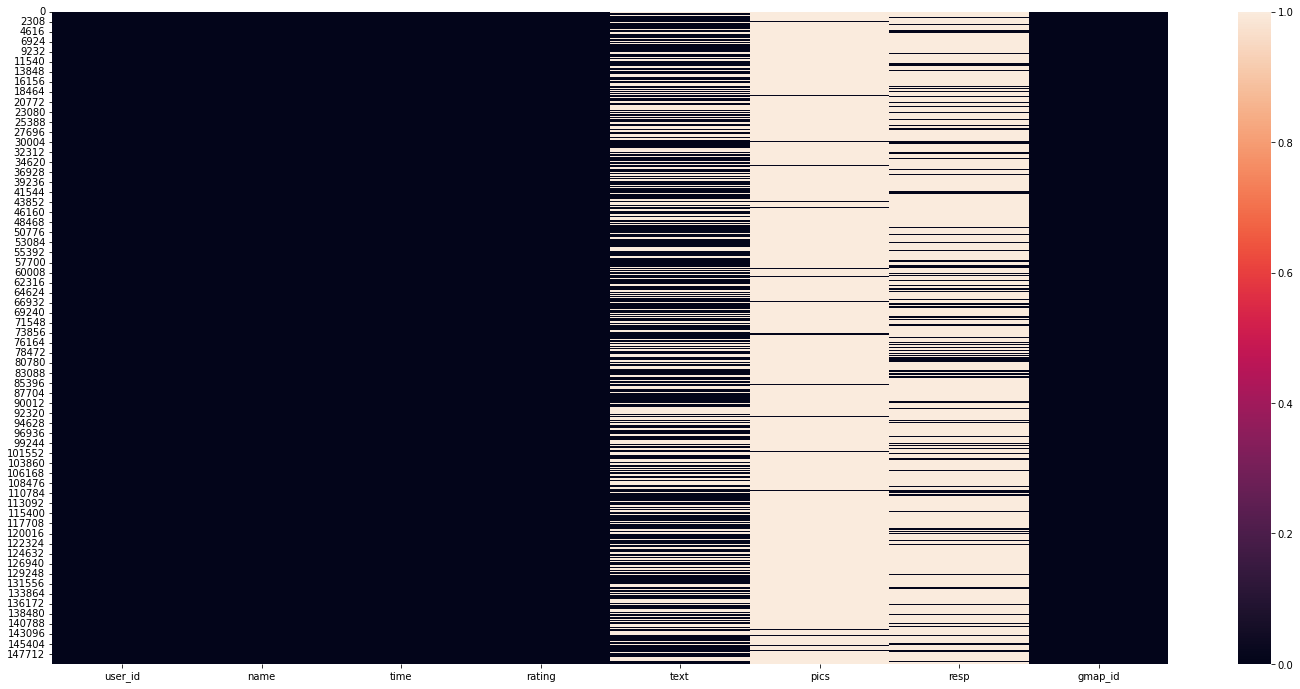

In [ ]:
plt.figure(figsize= (25,12))
sns.heatmap(reviews_Texas.isnull())
plt.show()

## Valores atípicos

Valores atípicos de la columna rating

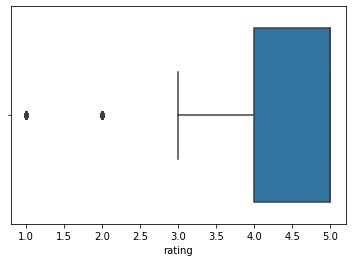

In [ ]:
sns.boxplot(x = 'rating', data = reviews_Texas)
plt.show()

In [ ]:
reviews_Texas.rating.min()

1

In [ ]:
reviews_Texas.rating.max()

5

## Valores duplicados

In [ ]:
''' Eliminamos aquellas columnas que tienen listas anidadas '''
reviews_Texas.drop(columns= ['name','pics', 'resp'], inplace=True)

In [ ]:
print(f"Hay {reviews_Texas.duplicated().sum()} valores duplicados")

Hay 4948 valores duplicados


In [ ]:
duplicados = reviews_Texas.duplicated()

num_duplicados = duplicados.sum()
num_no_duplicados = len(reviews_Texas) - num_duplicados

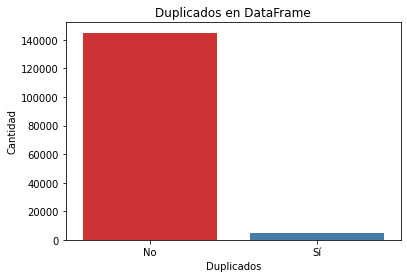

In [ ]:
sns.countplot(x= duplicados, palette='Set1')
plt.title('Duplicados en DataFrame')
plt.xlabel('Duplicados')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# **Estado de Florida**

In [ ]:
''' Abrimos el primer archivo .json de las reviews referidas al estado de California '''
blob = bucket.blob('Google-Maps/reviews-estados/review-Florida/8.json')
datos_str = blob.download_as_string()
reviews_florida = pd.read_json(datos_str, lines=True)
reviews_florida

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.104702e+20,paul lynch,1514980803126,5,Good service,None,None,0x88de11c0e8d32209:0x7c81f6c83581877
1,1.036286e+20,Maary Demmings,1497735129902,5,Good,None,None,0x88de11c0e8d32209:0x7c81f6c83581877
2,1.118701e+20,Aaron Wilder,1495653714688,5,Went there for work but it was busy and had a ...,None,None,0x88de11c0e8d32209:0x7c81f6c83581877
3,1.134749e+20,PewPew Gaming,1514486733158,1,Horrible service repairs... labor hourly rate ...,None,None,0x88de11c0e8d32209:0x7c81f6c83581877
4,1.133231e+20,Lee Rodriguez,1508589294156,5,Amazing people,None,None,0x88de11c0e8d32209:0x7c81f6c83581877
...,...,...,...,...,...,...,...,...
149995,1.140761e+20,carlos jaimes,1568825710365,4,None,None,None,0x88d909b7051d9807:0xf6638e378b0416a7
149996,1.062076e+20,Lew Graff,1304312616934,4,None,None,None,0x88d909b7051d9807:0xf6638e378b0416a7
149997,1.157316e+20,Sammy M,1482593194868,4,None,None,None,0x88d909b7051d9807:0xf6638e378b0416a7
149998,1.150730e+20,Amanda Grant,1574464961974,4,None,None,None,0x88d909b7051d9807:0xf6638e378b0416a7


In [ ]:
''' Visualizamos el tipo de dato de cada columna '''
reviews_florida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     92809 non-null   object 
 5   pics     5344 non-null    object 
 6   resp     27901 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [ ]:
reviews_florida.describe()

,user_id,time,rating
count,1.500000e+05,1.500000e+05,150000.000000
mean,1.092655e+20,1.553134e+12,4.273160
std,5.304734e+18,4.357603e+10,1.200247
min,1.000004e+20,1.229469e+12,1.000000
25%,1.046301e+20,1.524957e+12,4.000000
50%,1.092414e+20,1.555538e+12,5.000000
75%,1.138708e+20,1.582995e+12,5.000000
max,1.184467e+20,1.624188e+12,5.000000


In [ ]:
reviews_florida.shape

(150000, 8)

In [ ]:
reviews_florida.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

*   user_id = id del usuario que hace la reseña
*   name = nombre del usuario
*   time = fecha en que se realizo la reseña
*   rating = calificación dada por el usuario del 1 al 5
*   text = reseña del usuario
*   pics = url de las fotos que acompañan a la reseña
*   resp = respuesta de la reseña por parte del negocio, contiene de forma anidada una fecha y un texto
*   gmap_id = id del mapa

In [ ]:
''' Transformamos la columna 'time' a formato date ''' 

reviews_florida['time'] = pd.to_datetime(reviews_florida['time'], unit='ms')#.dt.strftime('%Y - %m - %d')

In [ ]:
reviews_florida.time

0        2018-01-03 12:00:03.126
1        2017-06-17 21:32:09.902
2        2017-05-24 19:21:54.688
3        2017-12-28 18:45:33.158
4        2017-10-21 12:34:54.156
                   ...          
149995   2019-09-18 16:55:10.365
149996   2011-05-02 05:03:36.934
149997   2016-12-24 15:26:34.868
149998   2019-11-22 23:22:41.974
149999   2017-02-18 20:59:05.236
Name: time, Length: 150000, dtype: datetime64[ns]

In [ ]:
#Usuarios unicos
print(f"Hay {len(reviews_florida['user_id'].unique())} usuarios unicos")

Hay 124704 usuarios unicos


## Valores faltantes

In [ ]:
reviews_florida.isnull().sum().sort_values(ascending = False)

pics       144656
resp       122099
text        57191
user_id         0
name            0
time            0
rating          0
gmap_id         0
dtype: int64

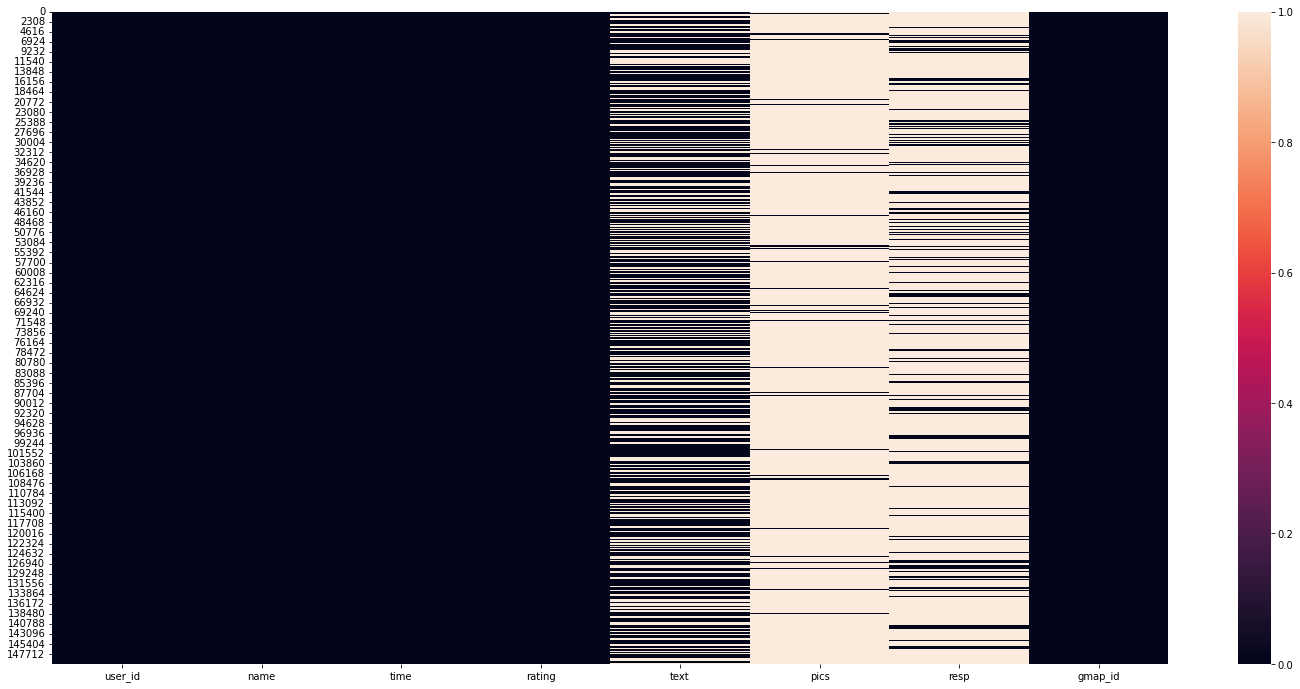

In [ ]:
plt.figure(figsize= (25,12))
sns.heatmap(reviews_florida.isnull())
plt.show()

##Valores atípicos

Valores atípicos de la columna rating

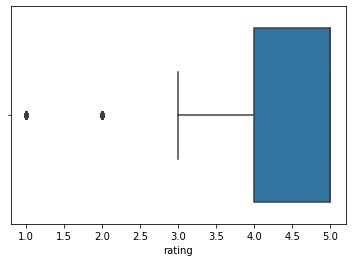

In [ ]:
sns.boxplot(x = 'rating', data = reviews_florida)
plt.show()

In [ ]:
reviews_florida.rating.min()

1

In [ ]:
reviews_florida.rating.max()

5

## Valores duplicados

In [ ]:
''' Eliminamos aquellas columnas que tienen listas anidadas '''
reviews_florida.drop(columns= ['name','pics', 'resp'], inplace=True)

In [ ]:
print(f"Hay {reviews_florida.duplicated().sum()} valores duplicados")

Hay 6500 valores duplicados


In [ ]:
duplicados = reviews_florida.duplicated()

num_duplicados = duplicados.sum()
num_no_duplicados = len(reviews_florida) - num_duplicados

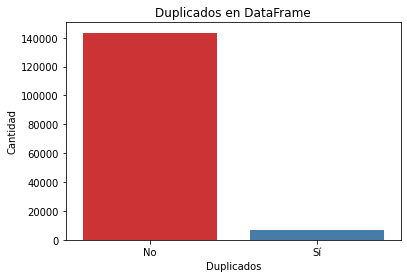

In [ ]:
sns.countplot(x= duplicados, palette='Set1')
plt.title('Duplicados en DataFrame')
plt.xlabel('Duplicados')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# **Estado de Pennsylvania**

In [ ]:
''' Abrimos el primer archivo .json de las reviews referidas al estado de Pennysylvania '''
blob = bucket.blob('Google-Maps/reviews-estados/review-Pennsylvania/13.json')
datos_str = blob.download_as_string()
reviews_penny = pd.read_json(datos_str, lines=True)
reviews_penny

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.076011e+20,Dan Carlson,1545329865857,5,This store & shop is the best one in the area....,None,None,0x89c6f1636d3657b1:0x1751fb816d53e479
1,1.150751e+20,Clay Fawthorp,1576458986615,5,Very knowledgeable staff. Great customer exper...,None,"{'time': 1576794810532, 'text': 'Thanks for th...",0x89c6f1636d3657b1:0x1751fb816d53e479
2,1.010987e+20,jose nieves,1600815924489,5,"From start to finish, the team at Trek in Wes...",None,"{'time': 1557159598666, 'text': 'Love to hear ...",0x89c6f1636d3657b1:0x1751fb816d53e479
3,1.125445e+20,R M,1534458115931,5,Great customer service and repair capabilities...,None,None,0x89c6f1636d3657b1:0x1751fb816d53e479
4,1.044814e+20,John DiGiuseppe,1546744348230,5,Mike and Bill were outstanding. Today’s bikes ...,None,None,0x89c6f1636d3657b1:0x1751fb816d53e479
...,...,...,...,...,...,...,...,...
149995,1.064576e+20,Jason Mcclosky,1558783762846,5,Authentic,None,None,0x8835aca94c7c006f:0x7f0c203c796f881d
149996,1.136654e+20,Sherrie Zataweski,1561107358438,5,Yum,None,None,0x8835aca94c7c006f:0x7f0c203c796f881d
149997,1.074070e+20,Tom H,1521531505990,5,Pizza is fantastic,None,None,0x8835aca94c7c006f:0x7f0c203c796f881d
149998,1.149843e+20,Noreen Preteroti,1547679917919,5,Great food!,None,None,0x8835aca94c7c006f:0x7f0c203c796f881d


In [ ]:
''' Visualizamos el tipo de dato de cada columna '''
reviews_penny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     84073 non-null   object 
 5   pics     3542 non-null    object 
 6   resp     17112 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [ ]:
reviews_penny.describe()

,user_id,time,rating
count,1.500000e+05,1.500000e+05,150000.000000
mean,1.092578e+20,1.552191e+12,4.360033
std,5.298905e+18,4.134412e+10,1.065215
min,1.000000e+20,1.140134e+12,1.000000
25%,1.046734e+20,1.526039e+12,4.000000
50%,1.092572e+20,1.554926e+12,5.000000
75%,1.138387e+20,1.580267e+12,5.000000
max,1.184467e+20,1.622455e+12,5.000000


In [ ]:
reviews_penny.shape

(150000, 8)

In [ ]:
reviews_penny.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

*   user_id = id del usuario que hace la reseña
*   name = nombre del usuario
*   time = fecha en que se realizo la reseña
*   rating = calificación dada por el usuario del 1 al 5
*   text = reseña del usuario
*   pics = url de las fotos que acompañan a la reseña
*   resp = respuesta de la reseña por parte del negocio, contiene de forma anidada una fecha y un texto
*   gmap_id = id del mapa

In [ ]:
''' Transformamos la columna 'time' a formato date ''' 

reviews_penny['time'] = pd.to_datetime(reviews_penny['time'], unit='ms')#.dt.strftime('%Y - %m - %d')

In [ ]:
reviews_penny.time

0        2018-12-20 18:17:45.857
1        2019-12-16 01:16:26.615
2        2020-09-22 23:05:24.489
3        2018-08-16 22:21:55.931
4        2019-01-06 03:12:28.230
                   ...          
149995   2019-05-25 11:29:22.846
149996   2019-06-21 08:55:58.438
149997   2018-03-20 07:38:25.990
149998   2019-01-16 23:05:17.919
149999   2018-08-02 14:59:54.563
Name: time, Length: 150000, dtype: datetime64[ns]

In [ ]:
#Usuarios unicos
print(f"Hay {len(reviews_penny['user_id'].unique())} usuarios unicos")

Hay 108189 usuarios unicos


## Valores faltantes

In [ ]:
reviews_penny.isnull().sum().sort_values(ascending = False)

pics       146458
resp       132888
text        65927
user_id         0
name            0
time            0
rating          0
gmap_id         0
dtype: int64

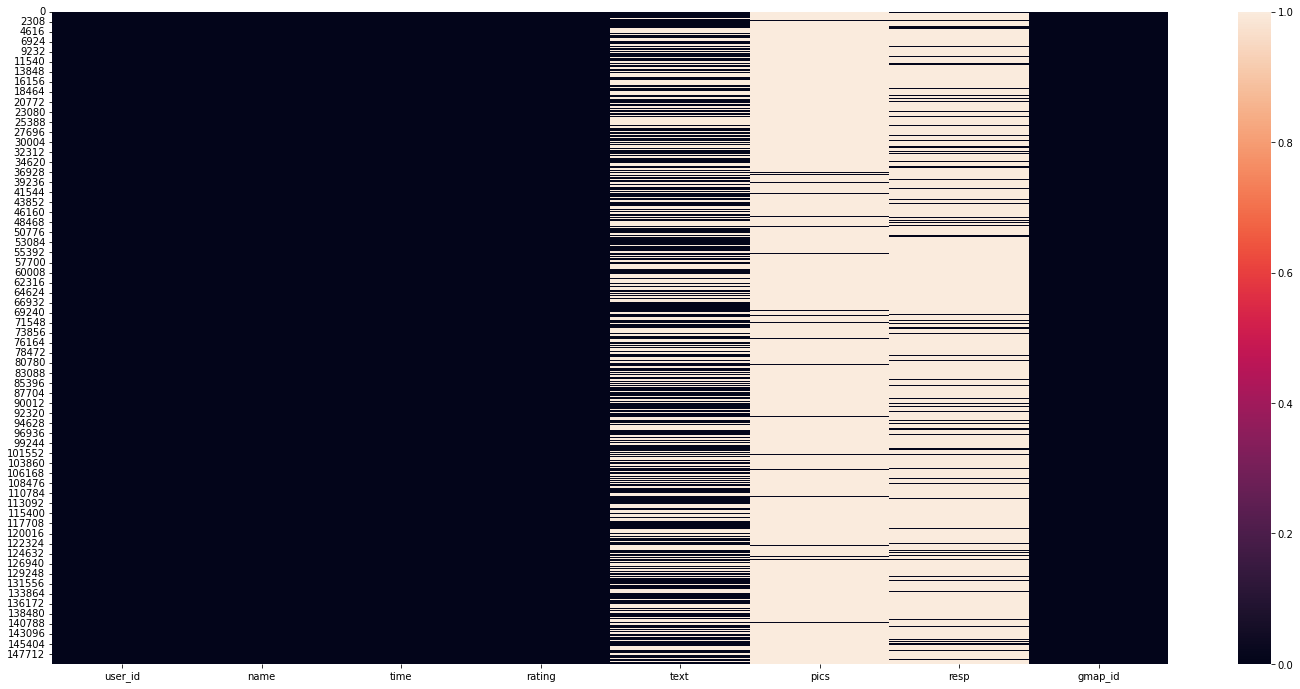

In [ ]:
plt.figure(figsize= (25,12))
sns.heatmap(reviews_penny.isnull())
plt.show()

## Valores atípicos

Valores atípicos de la columna rating

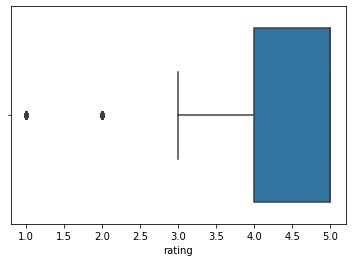

In [ ]:
sns.boxplot(x = 'rating', data = reviews_penny)
plt.show()

In [ ]:
reviews_penny.rating.min()

1

In [ ]:
reviews_penny.rating.max()

5

## Valores duplicados

In [ ]:
''' Eliminamos aquellas columnas que tienen listas anidadas '''
reviews_penny.drop(columns= ['name','pics', 'resp'], inplace=True)

In [ ]:
print(f"Hay {reviews_penny.duplicated().sum()} valores duplicados")

Hay 0 valores duplicados


In [ ]:
duplicados = reviews_penny.duplicated()

num_duplicados = duplicados.sum()
num_no_duplicados = len(reviews_penny) - num_duplicados

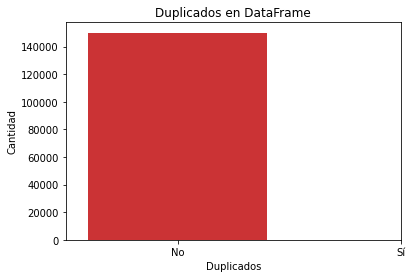

In [ ]:
sns.countplot(x= duplicados, palette='Set1')
plt.title('Duplicados en DataFrame')
plt.xlabel('Duplicados')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

A partir del análisis de calidad de datos en los datasets 'reviews' de Google Maps, concluímos en que los datos relevantes a conservar son los pertenecientes a las columnas 'user_id', 'time', 'rating', 'text' y 'gmap_id'.

Hemos decidido incluír los datos de las columnas time, rating y text en la definición de KPIs y complementar los valores faltantes de la columna text con otras fuentes de opiniones como por ejemplo la red social Twitter.

Transformaciones necesarias:

*   La columna 'time' deberá llamarse 'date'
*   La columna 'text' deberá llamarse 'opinion'
*   Los valores de la columna time deberán ser transformados a formato date
*   Se eliminarán las columnas 'pics', 'resp' y 'name'
*   Se eliminarán los datos duplicados de todas las tablas pertenecientes a reviews 
*   El orden y los nombres de las columnas se mantendrán de la siguiente manera 'user_id', 'date', 'rating', 'opinion', 'gmap_id'


#Abrimos un archivo .json de la carpeta 'metadata_sitios' como muestra

In [ ]:
blob2 = bucket.blob('Google-Maps/metadata-sitios/1.json')
datos_str2 = blob2.download_as_string()
metadata_sitios1 = pd.read_json(datos_str2, lines=True)


In [ ]:
metadata_sitios1 

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274996,Maven Realty,"Maven Realty, 2180 McMillan Ave #71672, North ...",0x88fe64e7daceaaab:0x101c046dcadcc9c3,None,32.857737,-79.985839,[Real estate agency],4.9,15,None,"[[Saturday, Open 24 hours], [Sunday, Open 24 h...",None,Open 24 hours,"[0x88fe657160ccc965:0xc675c849dc6d96ba, 0x88fe...",https://www.google.com/maps/place//data=!4m2!3...
274997,Stone Castle Fence,"Stone Castle Fence, 124 Cypress Gardens Rd, Mo...",0x88fe59f4602c95fd:0x57e2b1904d9e6949,None,33.089951,-80.078021,"[Fence contractor, Construction company, Contr...",4.0,18,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...",None,Closed ⋅ Opens 7AM Mon,"[0x88fe8d1444299bbb:0x91daa2e82c59ea94, 0x88fe...",https://www.google.com/maps/place//data=!4m2!3...
274998,Health Insurance Solutions Team,"Health Insurance Solutions Team, 6650 Rivers A...",0x88fe71f9617c15e1:0x89518c1d251706bf,None,32.918858,-80.027952,[Health insurance agency],5.0,18,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...","{'Service options': ['Online appointments'], '...",Closed ⋅ Opens 8AM Mon,"[0x88fe6fe45b8d3f15:0x41d4b940a40b246a, 0x88fe...",https://www.google.com/maps/place//data=!4m2!3...
274999,Bernard Building Center,"Bernard Building Center, 27300 M-32, M-32, Hil...",0x4d34c7517d6e6e29:0x7fe553ee2f090cf0,None,45.056691,-83.894423,"[Building materials store, Electrical supply s...",4.7,25,None,"[[Saturday, 8AM–3PM], [Sunday, Closed], [Monda...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 7:30AM Mon,"[0x4d335f6408d395d9:0xc20dea80d4c100d8, 0x4d34...",https://www.google.com/maps/place//data=!4m2!3...


In [ ]:
type(metadata_sitios1.address[18956])

str

In [ ]:
''' Visualizamos el tipo de dato de cada columna '''
metadata_sitios1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274994 non-null  object 
 1   address           264939 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       13155 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          272740 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             13450 non-null   object 
 10  hours             192448 non-null  object 
 11  MISC              194972 non-null  object 
 12  state             195523 non-null  object 
 13  relative_results  238771 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


In [ ]:
metadata_sitios1.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,275001.000000,275001.000000,275001.000000,275001.000000
mean,37.490112,-92.274708,4.307216,19.722750
std,5.405780,16.414617,0.790101,37.642092
min,-1.766059,-176.644648,1.000000,1.000000
25%,33.759405,-98.924254,4.000000,4.000000
50%,38.411790,-87.609055,4.500000,8.000000
75%,41.320476,-80.252418,5.000000,18.000000
max,70.398544,180.000000,5.000000,2114.000000


In [ ]:
metadata_sitios1.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

*   name = nombre del local
*   address = dirección física del local
*   gmap_id = id del local
*   description = descripción del lugar y sus productos y/o servicios
*   url = url del local en google maps
*   price = precio de los productos/servicios del local
*   latitude = latitud
*   longitud = longitud
*   category = rubro al que pertenece el local
*   avg_rating = rating promedio
*   num_of_reviews = cantidad de reseñas
*   hours = horarios de apertura y cierre del local
*   state = estado actual cerrado o abierto
*   MISC = categoría micelánea o diversa
*   relative_results = resultados de básqueda relacionados



## Valores faltantes

In [ ]:
metadata_sitios1.isnull().sum()

name                     7
address              10062
gmap_id                  0
description         261846
latitude                 0
longitude                0
category              2261
avg_rating               0
num_of_reviews           0
price               261551
hours                82553
MISC                 80029
state                79478
relative_results     36230
url                      0
dtype: int64

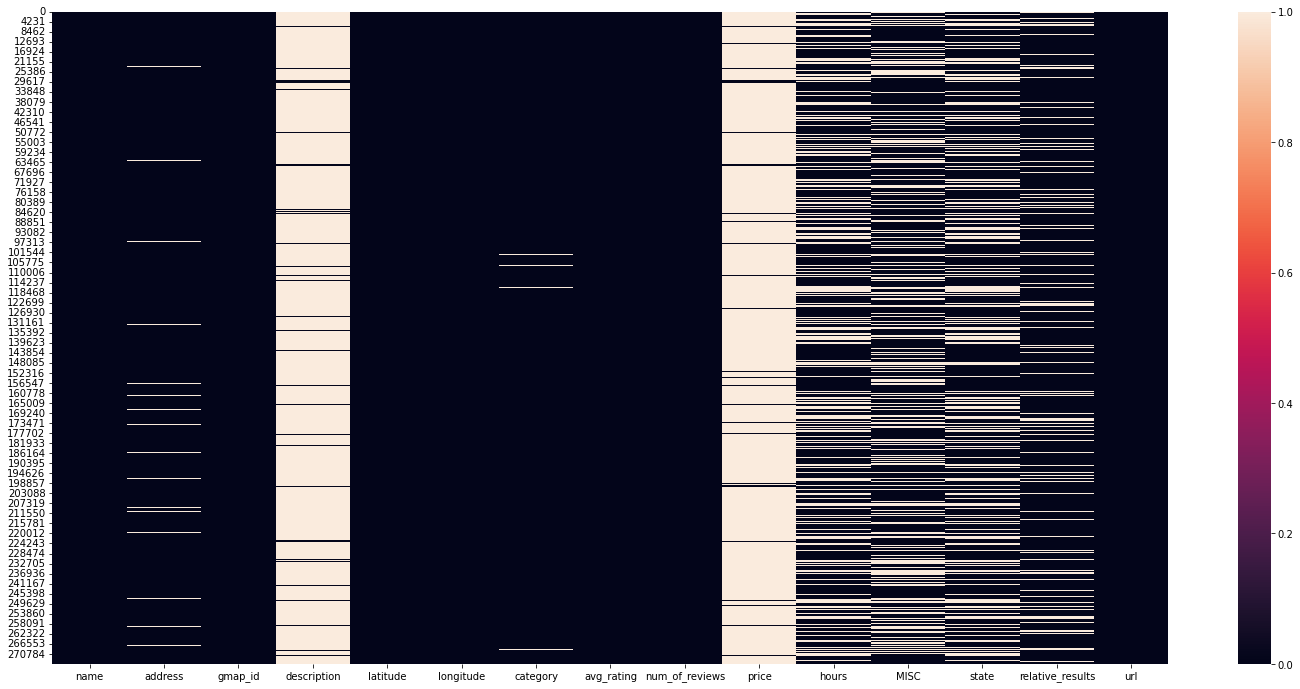

In [ ]:
plt.figure(figsize= (25,12))
sns.heatmap(metadata_sitios1.isnull())
plt.show()

## Valores atípicos

###Valores atípicos de la columna 'avg_rating'

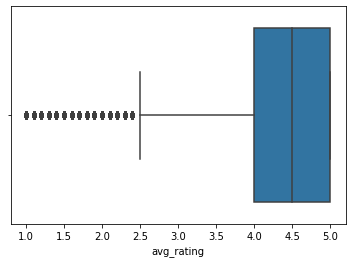

In [ ]:
''' hago un boxplot con los años de la columna avg_rating '''
sns.boxplot(x='avg_rating', data = metadata_sitios1)
plt.show()

In [ ]:
metadata_sitios1.avg_rating.min()

1.0

In [ ]:
metadata_sitios1.avg_rating.max()

5.0

###Valores atípicos de la columna 'num_of_reviews'

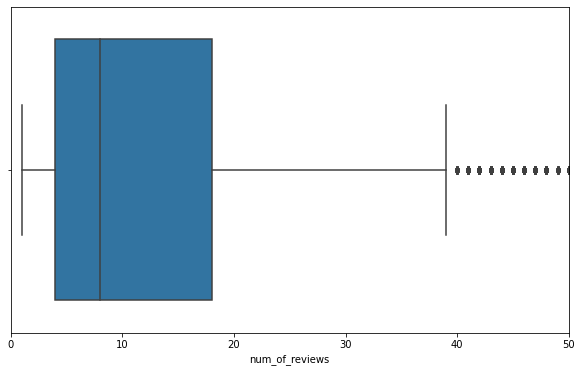

In [ ]:
''' hago un boxplot con los años de la columna num_of_reviews '''
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='num_of_reviews', data = metadata_sitios1)
plt.xlim((0, 50))
plt.show()

In [ ]:
''' menor cantidad de reviews por local '''
metadata_sitios1.num_of_reviews.min()

1

In [ ]:
''' mayor cantidad de reviews por local '''
metadata_sitios1.num_of_reviews.max()

2114

## Valores duplicados

In [ ]:
''' eliminamos columnas que contienen listas anidadas '''
metadata_sitios1.drop(columns= ['category','MISC', 'description', 'price', 'state', 'hours','relative_results', 'url'], inplace=True)

In [ ]:
metadata_sitios1

,name,address,gmap_id,latitude,longitude,avg_rating,num_of_reviews
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,4.9,16
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.215290,4.5,6
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,4.4,18
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,3.3,6
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,4.3,7
...,...,...,...,...,...,...,...
274996,Maven Realty,"Maven Realty, 2180 McMillan Ave #71672, North ...",0x88fe64e7daceaaab:0x101c046dcadcc9c3,32.857737,-79.985839,4.9,15
274997,Stone Castle Fence,"Stone Castle Fence, 124 Cypress Gardens Rd, Mo...",0x88fe59f4602c95fd:0x57e2b1904d9e6949,33.089951,-80.078021,4.0,18
274998,Health Insurance Solutions Team,"Health Insurance Solutions Team, 6650 Rivers A...",0x88fe71f9617c15e1:0x89518c1d251706bf,32.918858,-80.027952,5.0,18
274999,Bernard Building Center,"Bernard Building Center, 27300 M-32, M-32, Hil...",0x4d34c7517d6e6e29:0x7fe553ee2f090cf0,45.056691,-83.894423,4.7,25


In [ ]:
metadata_sitios1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
274996    False
274997    False
274998    False
274999    False
275000    False
Length: 275001, dtype: bool

In [ ]:
metadata_sitios1.duplicated().sum()

26573

A partir del análisis de calidad de datos en los datasets 'sitios' de Google Maps, concluímos en que los datos relevantes a conservar son los pertenecientes a las columnas 'gmap_id', 'name', 'avg_rating', 'latitude', 'longitude', 'num_of_reviews'y 'category'.

Hemos decidido descartar las siguientes columnas:

*  'description' y 'price': Las mismas poseen un porcentaje de valores faltantes muy alto y la información que contienen no es relevante en el proyecto.
*   'MISC', 'hours', 'state', 'relative_results': Contienen información irrelevante y/o repetida.
*   'address' y 'url': Contienen información relevante pero ya disponible en las columnas latitude y longitude.

Transformaciones necesarias:

*   La columna 'name' deberá llamarse 'local_name'.
*   Los valores de la columna 'category' deberán ser transformados a formato str.
*   Se eliminarán los datos duplicados de todas las tablas.
*   El orden y los nombres de las columnas se dispondrán de la siguiente manera: 'gmap_id', 'latitude', 'longitude', 'local_name','category' 'avg_rating', 'num_of_reviews'.


# **EDA Preliminar datasets de YELP**

In [ ]:
from google.colab import auth

auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash

In [ ]:
!gcloud init

In [ ]:
!gsutil cp gs://datasets-pg/Yelp/review.json